<a href="https://colab.research.google.com/github/kartik2627/natural-langugeprocessing/blob/main/Flipkart_Review_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Modules

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Loading the Dataset

In [ ]:
flipkart = pd.read_csv("/content/drive/MyDrive/Flipkart Review.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Printing the first five records of our data**

In [ ]:
flipkart.head()

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral


**Checking the null values and information of the data**

In [ ]:
flipkart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205052 entries, 0 to 205051
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   product_name   205052 non-null  object
 1   product_price  205052 non-null  object
 2   Rate           205052 non-null  object
 3   Review         180388 non-null  object
 4   Summary        205041 non-null  object
 5   Sentiment      205052 non-null  object
dtypes: object(6)
memory usage: 9.4+ MB


In [ ]:
flipkart.isnull().sum()

product_name         0
product_price        0
Rate                 0
Review           24664
Summary             11
Sentiment            0
dtype: int64

## Revoming the Null values form our data

In [ ]:
flipkart.dropna(inplace=True)
flipkart.reset_index(drop=True,inplace=True)

## Droping product name and price

In [ ]:
flipkart.drop(['product_name','product_price'],axis=1,inplace=True)

In [ ]:
flipkart.head()

,Rate,Review,Summary,Sentiment
0,5,super!,great cooler excellent air flow and for this p...,positive
1,5,awesome,best budget 2 fit cooler nice cooling,positive
2,3,fair,the quality is good but the power of air is de...,positive
3,1,useless product,very bad product its a only a fan,negative
4,3,fair,ok ok product,neutral


## Checking the no of reviews in our dataset

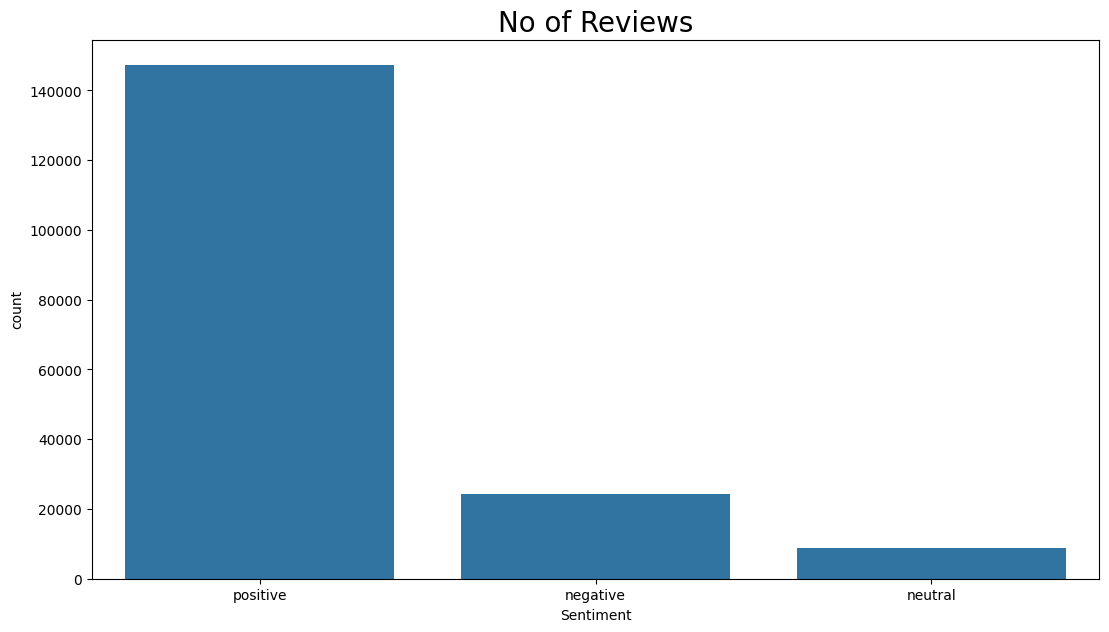

In [ ]:
plt.figure(figsize=(13,7))
sns.countplot(data=flipkart,x='Sentiment')
plt.title('No of Reviews',size=20)
plt.show()

In [ ]:
flipkart.head()

,Rate,Review,Summary,Sentiment
0,5,super!,great cooler excellent air flow and for this p...,positive
1,5,awesome,best budget 2 fit cooler nice cooling,positive
2,3,fair,the quality is good but the power of air is de...,positive
3,1,useless product,very bad product its a only a fan,negative
4,3,fair,ok ok product,neutral


### Removing space from the Review column

**This is because we don't want to treat for example 'useless' and 'product' as two
separate words.**

In [ ]:
flipkart['Review'] = flipkart['Review'].apply(lambda review: review.replace(' ',''))

## Converting Rate, Review and Summary into list form to concat

In [ ]:
flipkart['Rate'] = flipkart['Rate'].apply(lambda rate: [rate])

In [ ]:
flipkart['Review'] = flipkart['Review'].apply(lambda review: [review])

In [ ]:
flipkart['Summary'] = flipkart['Summary'].apply(lambda summary: summary.split())

In [ ]:
flipkart.head()

,Rate,Review,Summary,Sentiment
0,[5],[super!],"[great, cooler, excellent, air, flow, and, for...",positive
1,[5],[awesome],"[best, budget, 2, fit, cooler, nice, cooling]",positive
2,[3],[fair],"[the, quality, is, good, but, the, power, of, ...",positive
3,[1],[uselessproduct],"[very, bad, product, its, a, only, a, fan]",negative
4,[3],[fair],"[ok, ok, product]",neutral


## Making Tag column from Rate, Review and Summary

In [ ]:
flipkart['Tag'] = flipkart['Rate'] + flipkart['Review'] + flipkart['Summary']

In [ ]:
flipkart.head()

,Rate,Review,Summary,Sentiment,Tag
0,[5],[super!],"[great, cooler, excellent, air, flow, and, for...",positive,"[5, super!, great, cooler, excellent, air, flo..."
1,[5],[awesome],"[best, budget, 2, fit, cooler, nice, cooling]",positive,"[5, awesome, best, budget, 2, fit, cooler, nic..."
2,[3],[fair],"[the, quality, is, good, but, the, power, of, ...",positive,"[3, fair, the, quality, is, good, but, the, po..."
3,[1],[uselessproduct],"[very, bad, product, its, a, only, a, fan]",negative,"[1, uselessproduct, very, bad, product, its, a..."
4,[3],[fair],"[ok, ok, product]",neutral,"[3, fair, ok, ok, product]"


## Making a dataset from Tag and Sentiment

In [ ]:
flipkart_tag = flipkart[['Tag','Sentiment']]

In [ ]:
flipkart_tag.head()

,Tag,Sentiment
0,"[5, super!, great, cooler, excellent, air, flo...",positive
1,"[5, awesome, best, budget, 2, fit, cooler, nic...",positive
2,"[3, fair, the, quality, is, good, but, the, po...",positive
3,"[1, uselessproduct, very, bad, product, its, a...",negative
4,"[3, fair, ok, ok, product]",neutral


## Applying Stemming on Tag for removing the forms of verb

In [ ]:
from nltk.stem.porter import PorterStemmer

porter_stem = PorterStemmer()

In [ ]:
porter_stem.stem('Loving')

'love'

In [ ]:
def tag_stemming(words):
    temp = []
    for word in words:
        stemmed_word = porter_stem.stem(word)
        temp.append(stemmed_word)
    return temp

In [ ]:
flipkart_tag['Tag'] = flipkart_tag['Tag'].apply(tag_stemming)

<ipython-input-33-1907ad71b876>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flipkart_tag['Tag'] = flipkart_tag['Tag'].apply(tag_stemming)


**Converting our Tag column into a string form**

In [ ]:
flipkart_tag['Tag'] = flipkart_tag['Tag'].apply(lambda tag: ' '.join(tag))

<ipython-input-34-8be9c1d2c529>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flipkart_tag['Tag'] = flipkart_tag['Tag'].apply(lambda tag: ' '.join(tag))


In [ ]:
flipkart_tag.head()

,Tag,Sentiment
0,5 super! great cooler excel air flow and for t...,positive
1,5 awesom best budget 2 fit cooler nice cool,positive
2,3 fair the qualiti is good but the power of ai...,positive
3,1 uselessproduct veri bad product it a onli a fan,negative
4,3 fair ok ok product,neutral


# Applying Count Vectorizer

**We are picking 5000 most comman words to converting our text data into numeric**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vector = CountVectorizer(max_features=500, stop_words='english')

### Fitting the model on Tag column

In [ ]:
count_vector.fit(flipkart_tag['Tag'])

CountVectorizer(max_features=500, stop_words='english')

### Storing the transformed data into a variable

In [ ]:
arr = count_vector.transform(flipkart_tag['Tag']).toarray()

In [ ]:
arr.shape

(180379, 500)

## Spliting our data into the train and test

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(arr,flipkart_tag['Sentiment']
                                                ,test_size=0.2,random_state=101)

# Applying Naive Bayes Algo

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB

gaussian_nb = GaussianNB()

In [ ]:
multi_nb = MultinomialNB()

## Fitting our models on training data

In [ ]:
gaussian_nb.fit(X_train,Y_train)

GaussianNB()

In [ ]:
multi_nb.fit(X_train,Y_train)

MultinomialNB()

## Making Predictions

In [ ]:
predictions_gaussian = gaussian_nb.predict(X_test)

In [ ]:
predictions_multi = multi_nb.predict(X_test)

## Checking Our Model's Performance

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(predictions_gaussian,Y_test))

              precision    recall  f1-score   support

    negative       0.56      0.69      0.62      3987
     neutral       0.76      0.07      0.13     17954
    positive       0.47      0.98      0.63     14135

    accuracy                           0.50     36076
   macro avg       0.60      0.58      0.46     36076
weighted avg       0.63      0.50      0.38     36076



In [ ]:
print(classification_report(predictions_multi,Y_test))

              precision    recall  f1-score   support

    negative       0.84      0.82      0.83      4989
     neutral       0.31      0.48      0.38      1113
    positive       0.97      0.95      0.96     29974

    accuracy                           0.92     36076
   macro avg       0.70      0.75      0.72     36076
weighted avg       0.93      0.92      0.92     36076

